In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the historical vacancy data
df = pd.read_csv('internet_vacancies.csv')
date_cols = [col for col in df.columns if '-' in col]

df.head(5)

,Level,State,region_name,region_code,region_level,ANZSCO_CODE,ANZSCO_TITLE,Jan-19,Feb-19,Mar-19,...,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25,Nov-25
0,1,NSW,Greater Sydney,1GSYD,GCCSA,0,Greater Sydney TOTAL,50206,50455,57031,...,"40,594","46,203","44,118","44,332","43,010","44,887","44,432","45,823","45,955","44,683"
1,2,NSW,Greater Sydney,1GSYD,GCCSA,1,MANAGERS,8144,8311,9366,...,"6,075","6,957","6,676","6,761","6,546","6,738","6,687","6,809","6,676","6,347"
2,3,NSW,Greater Sydney,1GSYD,GCCSA,11,"Chief Executives, Managing Directors & Legisla...",223,221,249,...,231,256,245,244,248,259,261,256,243,245
3,3,NSW,Greater Sydney,1GSYD,GCCSA,12,Farmers and Farm Managers,7,8,10,...,8,11,12,12,9,9,11,10,10,7
4,3,NSW,Greater Sydney,1GSYD,GCCSA,14,"Hospitality, Retail and Service Managers",1759,1794,1980,...,"1,548","1,810","1,699","1,739","1,638","1,724","1,726","1,809","1,791","1,684"


In [94]:
# Mapping ANZSCO codes with titles
mapping = (
    df[["ANZSCO_CODE", "ANZSCO_TITLE"]]
    .drop_duplicates()
    #.sort_values("ANZSCO_CODE")
)
mapping.head(20)

,ANZSCO_CODE,ANZSCO_TITLE
0,0,Greater Sydney TOTAL
1,1,MANAGERS
2,11,"Chief Executives, Managing Directors & Legisla..."
3,12,Farmers and Farm Managers
4,14,"Hospitality, Retail and Service Managers"
5,1A,Corporate Managers
6,1B,"Construction, Production and Distribution Mana..."
7,1C,"Health, Education, ICT and Other Managers"
8,2,PROFESSIONALS
9,21,Arts and Media Professionals


**ANZSCO_CODE for ICT professionals is "26"**

In [95]:
# converting all date_cols into int
for date_col in date_cols:
    if not pd.api.types.is_integer_dtype(df[date_col]):
        df[date_col] = (
        df[date_col]
          .str.replace(",", "", regex=False)
          .astype(int)
)

In [177]:
aus_df = (
    df
    .groupby(["ANZSCO_CODE", "ANZSCO_TITLE"], as_index=False)[date_cols]
    .sum()
)
aus_df[aus_df["ANZSCO_CODE"].str.len() == 2].head(5)
aus_df

,ANZSCO_CODE,ANZSCO_TITLE,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,...,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25,Nov-25
0,0,Australian Capital Territory TOTAL,5045,4925,5675,5621,5887,5753,6129,6182,...,4839,5323,5125,5062,4768,4827,4689,4985,4880,4678
1,0,Ballarat TOTAL,532,532,615,589,620,620,671,641,...,879,947,901,886,857,868,844,860,879,868
2,0,Barossa - Yorke - Mid North TOTAL,182,172,200,197,216,210,222,213,...,488,518,443,477,456,517,511,548,552,552
3,0,Bendigo TOTAL,362,372,428,401,406,403,446,429,...,756,821,783,800,784,822,816,850,842,813
4,0,Bunbury TOTAL,561,557,607,575,598,573,577,566,...,1141,1255,1139,1173,1106,1157,1180,1247,1265,1215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,82,Construction and Mining Labourers,1073,1077,1225,1149,1147,1095,1179,1185,...,1379,1619,1542,1526,1468,1544,1584,1684,1732,1658
102,83,Factory Process Workers,1726,1661,1908,1805,1793,1701,1790,1815,...,1747,2031,1964,1968,1901,1958,1993,2168,2246,2159
103,84,"Farm, Forestry and Garden Workers",617,610,669,585,556,512,547,571,...,847,941,850,814,769,810,855,926,955,910
104,85,Food Preparation Assistants,901,882,999,940,942,843,904,955,...,971,940,886,904,859,904,919,1009,1069,1063


In [178]:
def plot_vacancies(code, code_alt=None):

    title = aus_df.loc[aus_df["ANZSCO_CODE"] == code, "ANZSCO_TITLE"][0]
    vline_covid = pd.to_datetime("2020-3-01")
    vline_gpt = pd.to_datetime("2022-11-30")
    
    months = [c for c in aus_df.columns if "-" in c]
    months_dt = pd.to_datetime(month_cols, format="%b-%y")

    values = aus_df.loc[aus_df["ANZSCO_CODE"] == code, months].iloc[0].tolist()
    
    plt.plot(months_dt, values, label=title)

    if code_alt:
        title_alt = aus_df.loc[aus_df["ANZSCO_CODE"] == code_alt, "ANZSCO_TITLE"].item()
        values_alt = aus_df.loc[aus_df["ANZSCO_CODE"] == code_alt, months].iloc[0].tolist()
        plt.plot(months_dt, values_alt, color="brown", label=title_alt)
    
    plt.axvline(vline_covid, linestyle=":", linewidth=1, label="COVID-19", color="red")
    plt.axvline(vline_gpt, linestyle=":", linewidth=1, label="GPT-3.5", color="green")
    plt.legend()
    plt.xlabel("Month")
    plt.ylabel("Vacancies")
    plt.title(f"{title} Vacancies over time (Australia)")
    plt.tight_layout()
    plt.show()


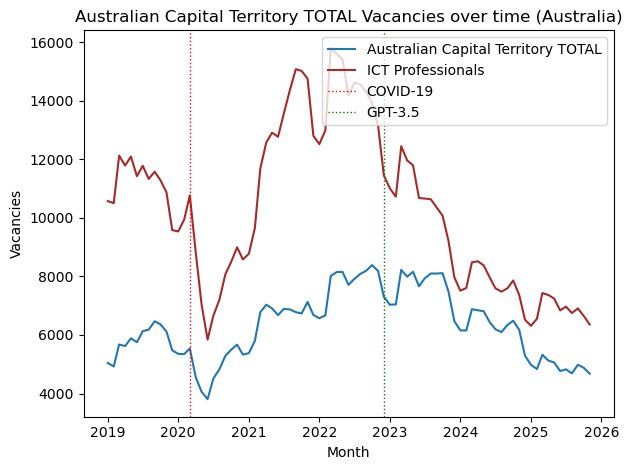

In [180]:
plot_vacancies("0", "26")